<a href="https://colab.research.google.com/github/MariNascimento1/AprendendoPython/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Carregando Dados :

In [5]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [8]:
x = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

x.rename({'gender': "Gênero",
           'age': "Idade",
           'hypertension': "Hipertensão",
           'heart_disease': "Doença Cardíaca",
           'smoking_history': "Histórico de Fumante",
           'bmi': "IMC",
           'HbA1c_level': "HbA1c",
           'blood_glucose_level': "Nível de Glicose no sangue"}, axis = 1, inplace = True)

<ipython-input-8-587d921c22b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.rename({'gender': "Gênero",


#Limpeza de Dados

In [9]:
df.drop_duplicates(inplace = True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [10]:
#df = df[df['smoking_history'] != 'No Info']
#df = df[df['diabetes'] != 0]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [11]:
df.shape

(96146, 9)

In [12]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [13]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [14]:
df.reset_index(inplace = True, drop = True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,No Info,24.60,4.8,145,0
96142,Female,2.0,0,0,No Info,17.37,6.5,100,0
96143,Male,66.0,0,0,former,27.83,5.7,155,0
96144,Female,24.0,0,0,never,35.42,4.0,100,0


#Hipóteses Bivariadas


##O gênero masculino tem uma tendência maior de ter diabetes, de acordo com o dataset?


In [15]:

diabetes_por_genero = df.groupby('gender')['diabetes'].sum()

total_por_genero = df['gender'].value_counts()

proporcao_diabetes_por_genero = diabetes_por_genero / total_por_genero

proporcao_diabetes_por_genero_percentual = proporcao_diabetes_por_genero * 100

print(proporcao_diabetes_por_genero_percentual)


gender
Female     7.918306
Male      10.095829
Other      0.000000
dtype: float64


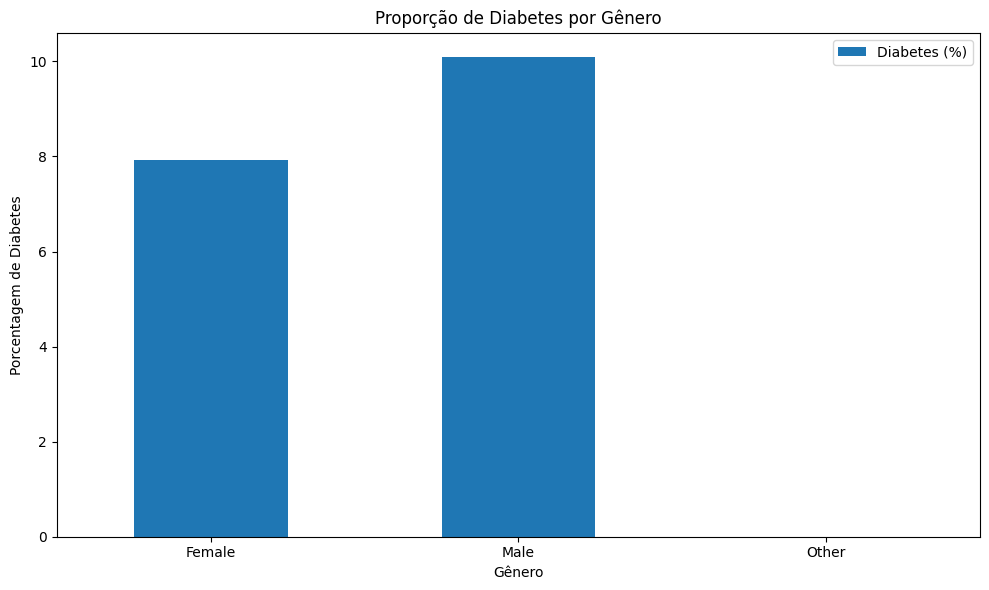

In [16]:
proporcao_diabetes_por_genero_percentual = proporcao_diabetes_por_genero * 100

df_temp = pd.DataFrame({'Diabetes (%)': proporcao_diabetes_por_genero_percentual})

df_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Proporção de Diabetes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem de Diabetes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##Pessoas que apresentam hipertensão também têm diabetes?

In [17]:
diabetes_hipertensao = df[df['hypertension'] == 1]['diabetes'].sum()

total_hipertensao = df['hypertension'].sum()

diabetes_sem_hipertensao = df[df['hypertension'] == 0]['diabetes'].sum()

total_sem_hipertensao = len(df) - total_hipertensao

diabetes_hiper = diabetes_hipertensao / total_hipertensao

diabetes_sem_hiper = diabetes_sem_hipertensao / total_sem_hipertensao

print("Proporção de diabetes entre pessoas com hipertensão:", diabetes_hiper)
print("Proporção de diabetes entre pessoas sem hipertensão:", diabetes_sem_hiper)


Proporção de diabetes entre pessoas com hipertensão: 0.27958718670419513
Proporção de diabetes entre pessoas sem hipertensão: 0.0721204262276597


In [18]:
diabetes_hiper = df[df['hypertension'] == 1]['diabetes'].sum() / df['hypertension'].sum() * 100
diabetes_sem_hiper = df[df['hypertension'] == 0]['diabetes'].sum() / (len(df) - df['hypertension'].sum()) * 100

print(f"Proporção de diabetes entre pessoas com hipertensão: {diabetes_hiper :.2f}%")
print(f"Proporção de diabetes entre pessoas sem hipertensão: {diabetes_sem_hiper :.2f}%")

Proporção de diabetes entre pessoas com hipertensão: 27.96%
Proporção de diabetes entre pessoas sem hipertensão: 7.21%


<ipython-input-19-0f618f98b69f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hipertensão', y='Diabetes (%)', data=df_temp, palette=['#FF0000', '#00FF00'])


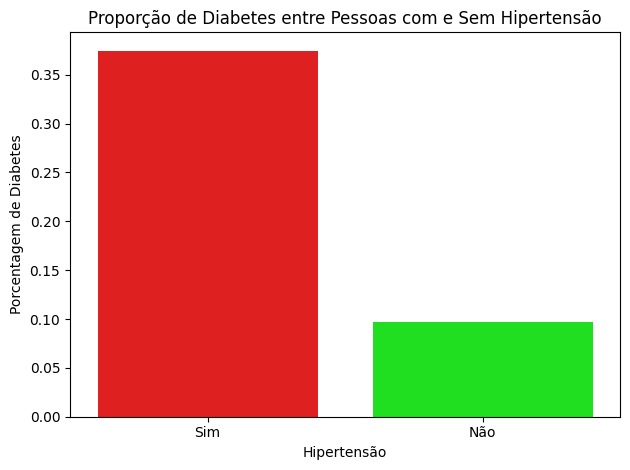

In [19]:
diabetes_hipertensao = df[df['hypertension'] == 1]['diabetes'].sum() / df['hypertension'].sum() * 100
diabetes_sem_hipertensao = df[df['hypertension'] == 0]['diabetes'].sum() / (len(df) - df['hypertension'].sum()) * 100

df_temp = pd.DataFrame({
    'Hipertensão': ['Sim', 'Não'],
    'Diabetes': [diabetes_hipertensao, diabetes_sem_hipertensao]
})

df_temp['Diabetes (%)'] = df_temp['Diabetes'] / df['hypertension'].sum() * 100


sns.barplot(x='Hipertensão', y='Diabetes (%)', data=df_temp, palette=['#FF0000', '#00FF00'])
plt.title('Proporção de Diabetes entre Pessoas com e Sem Hipertensão')
plt.xlabel('Hipertensão')
plt.ylabel('Porcentagem de Diabetes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##Qual é a relação entre o nível de glicemia no sangue e a diabetes?


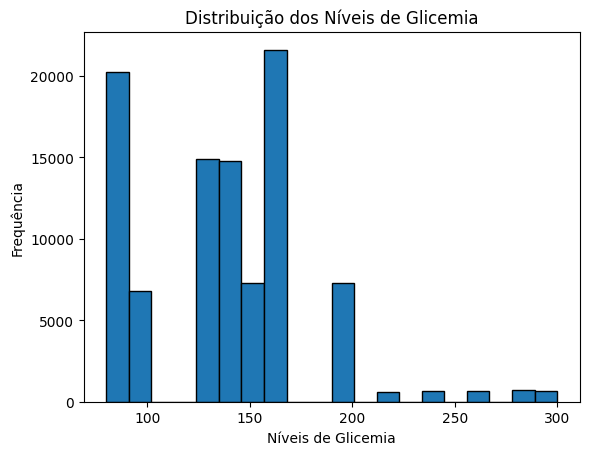

In [20]:
plt.hist(df['blood_glucose_level'], bins=20, edgecolor='black')
plt.title('Distribuição dos Níveis de Glicemia')
plt.xlabel('Níveis de Glicemia')
plt.ylabel('Frequência')
plt.show()

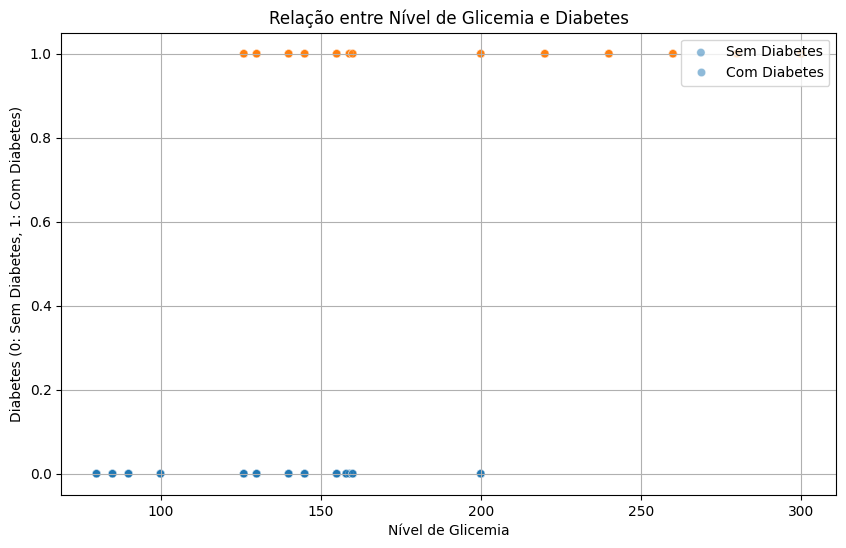

In [21]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='blood_glucose_level', y='diabetes', hue='diabetes', alpha=0.5)
plt.title('Relação entre Nível de Glicemia e Diabetes')
plt.xlabel('Nível de Glicemia')
plt.ylabel('Diabetes (0: Sem Diabetes, 1: Com Diabetes)')
plt.legend(['Sem Diabetes', 'Com Diabetes'], loc='upper right')
plt.grid(True)
plt.show()


#Hipóteses Multivariadas


##Indivíduos com alto IMC e histórico de fumante têm uma predisposição a ter diabetes?

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64


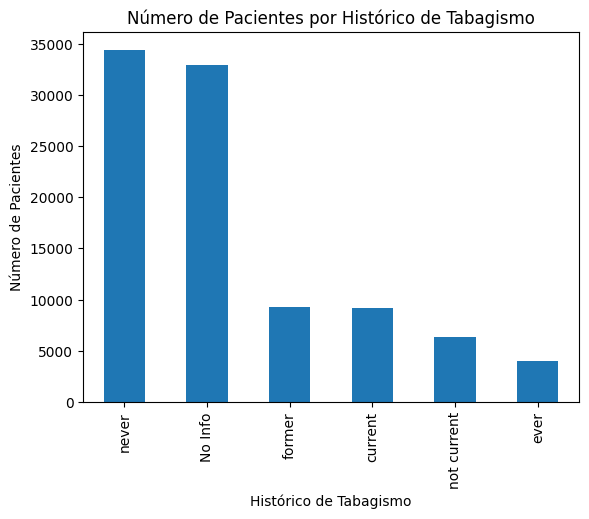

In [22]:
smoking_history_counts = df['smoking_history'].value_counts()
print(smoking_history_counts)


smoking_history_counts.plot(kind='bar')
plt.title('Número de Pacientes por Histórico de Tabagismo')
plt.xlabel('Histórico de Tabagismo')
plt.ylabel('Número de Pacientes')
plt.show()

In [23]:
alto_imc = df['bmi'] > 30

diabetes_alto_imc_fumante = df[(alto_imc) & (df['smoking_history'] == 'current')]['diabetes'].mean()
diabetes_alto_imc_sem_fumante = df[(alto_imc) & (df['smoking_history']!= 'current')]['diabetes'].mean()
diabetes_baixo_imc_fumante = df[~(alto_imc) & (df['smoking_history'] == 'current')]['diabetes'].mean()

diabetes_baixo_imc_sem_fumante = df[~(alto_imc) & (df['smoking_history']!= 'current')]['diabetes'].mean()

print(f"Proporção de Diabetes para Alto IMC e Fumante: {diabetes_alto_imc_fumante :.3f}%")
print(f"Proporção de Diabetes para Alto IMC sem Fumante: {diabetes_alto_imc_sem_fumante:.3f}%")
print(f"Proporção de Diabetes para Baixo IMC e Fumante: {diabetes_baixo_imc_fumante:.3f}%")
print(f"Proporção de Diabetes para Baixo IMC sem Fumante: {diabetes_baixo_imc_sem_fumante:.3f}%")


Proporção de Diabetes para Alto IMC e Fumante: 0.175%
Proporção de Diabetes para Alto IMC sem Fumante: 0.181%
Proporção de Diabetes para Baixo IMC e Fumante: 0.074%
Proporção de Diabetes para Baixo IMC sem Fumante: 0.057%


<ipython-input-24-e8d2a205956f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fatores de Risco', y='Diabetes (%)', data=df_temp, palette=['#FF0000', '#00FF00', '#0000FF', '#FFFF00'])


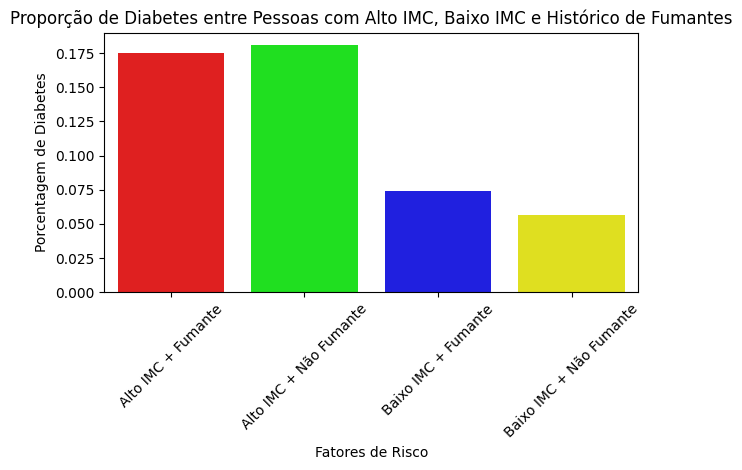

In [24]:
df_temp = pd.DataFrame({
    'Fatores de Risco': ['Alto IMC + Fumante', 'Alto IMC + Não Fumante', 'Baixo IMC + Fumante', 'Baixo IMC + Não Fumante'],
    'Diabetes (%)': [diabetes_alto_imc_fumante, diabetes_alto_imc_sem_fumante, diabetes_baixo_imc_fumante, diabetes_baixo_imc_sem_fumante]
})


sns.barplot(x='Fatores de Risco', y='Diabetes (%)', data=df_temp, palette=['#FF0000', '#00FF00', '#0000FF', '#FFFF00'])
plt.title('Proporção de Diabetes entre Pessoas com Alto IMC, Baixo IMC e Histórico de Fumantes')
plt.xlabel('Fatores de Risco')
plt.ylabel('Porcentagem de Diabetes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()